# MANEJO DE VALORES  ATIPICOS

Un breve código que explica que hacer con valores attipicos en un Dataframe.

In [10]:
# IMPORTACIÓN DE LIBRERIAS 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# CREACIÓN DEL DATAFRAME CON DATOS ALEATORIOS

np.random.seed(42)
data = {
    'A': np.random.normal(50, 5, 20).tolist() + [100, 101],  # Columna con algunos valores atípicos
    'B': np.random.normal(30, 2, 22).tolist(),               # Columna sin atípicos
    'C': np.random.normal(10, 1, 22).tolist()                # Columna sin atípicos
}

df = pd.DataFrame(data)
df.head(5)

,A,B,C
0,52.483571,32.931298,9.884352
1,49.308678,29.548447,9.698896
2,53.238443,30.135056,8.521478
3,57.615149,27.150504,9.280156
4,48.829233,28.911235,9.539361


In [8]:
# VALIDACIÓN DE ESTADISTICAS 

df.describe()

,A,B,C
count,22.000000,22.000000,22.000000
mean,53.812279,29.599121,9.799499
std,15.786856,1.897897,0.824509
min,40.433599,26.080660,8.236960
25%,47.304579,28.112580,9.290886
50%,49.068997,29.760726,9.694842
75%,53.107032,30.411726,10.340530
max,101.000000,33.704556,11.057122


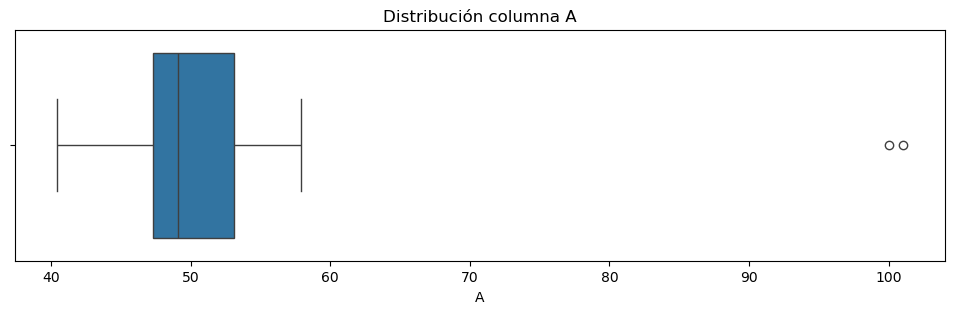

In [20]:
# BOXPLOT COLUMNA A 

plt.figure(figsize=(12,3))
sns.boxplot(df, x="A")
plt.title("Distribución columna A");

- Hay dos valores átipicos.

### PASO 1: Calcular el rango intercuartil (IQR)

In [28]:
# CALCULAR QUARTILES 1 Y 3

Q1 = df['A'].quantile(0.25)
Q3 = df['A'].quantile(0.75)
Q1, Q3

(47.30457878292766, 53.107032072360056)

In [30]:
# CALCULAR RANGO INTERCUALTIL (IQR)

IQR = Q3 - Q1
IQR

5.802453289432393

In [36]:
# CÁLCULO DE LIMETES 

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
limite_inferior, limite_superior

(38.600898848779075, 61.810712006508645)

### PASO 2: Filtrar los valores atípicos

In [43]:
# FILTRAR LOS VALORES ATIPICOS EN LA COLUMNA A

valores_atipicos = df[(df['A'] < limite_inferior) | (df['A'] > limite_superior)]
valores_atipicos["A"]

20    100.0
21    101.0
Name: A, dtype: float64

### PASO 3: REEMPLAZAR O BORRAR VALORES ATIPICOS

In [47]:
# REEMPLZAMOS LOS ATIPICOS CON LIMITE SUPERIOR


df['A'] = df['A'].apply(lambda x: limite_superior if (x < limite_inferior) or (x > limite_superior) else x)
df.head(5)

,A,B,C
0,52.483571,32.931298,9.884352
1,49.308678,29.548447,9.698896
2,53.238443,30.135056,8.521478
3,57.615149,27.150504,9.280156
4,48.829233,28.911235,9.539361


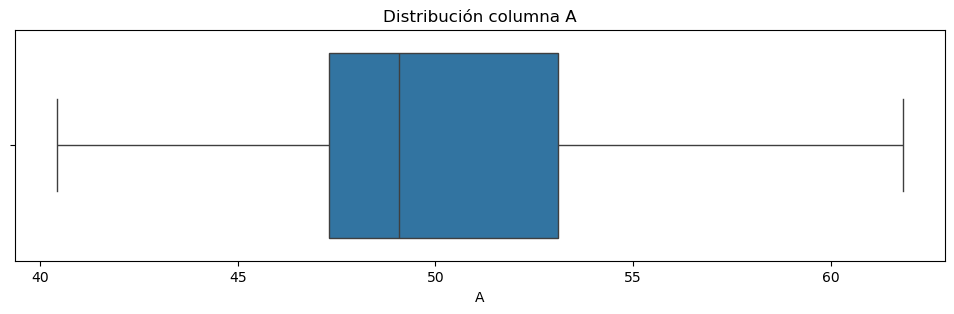

In [49]:
# NUEVAMENTE GRPAFICAMOS EL BOXPLOT

plt.figure(figsize=(12,3))
sns.boxplot(df, x="A")
plt.title("Distribución columna A");

- Ya no hay valores átipicos. 